In [1]:
import numpy as np
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [2]:
# let's assign a really simple data set:
x = np.array(np.arange(0,2*np.pi,2*np.pi/100)).reshape(-1,1)
y = np.array(np.cos(x)).transpose()
# we're going to introduce a bit of noise to the data set by simply adding some uniformly distributed values to y
y = np.squeeze((y+np.random.rand(1,100)/2))


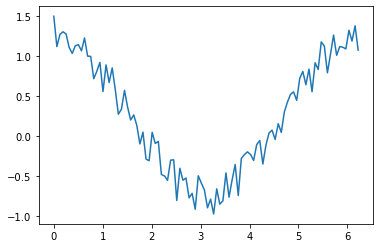

In [3]:
# Checking that the shape of y(x) is still human readable, as it should be. 
plt.plot(x,np.transpose(y))

In [4]:
# Now, let us simply suppose we do not know what y(x) actually is, let's apply some nonlinear regression at it.
# Start with simple linear regression:
simple_LR_model = LinearRegression()
#reshaping data appropriately
#rs_x = x.reshape(1,-1)
#rs_y = y.reshape(-1,1)
simple_LR_model.fit(x,y)
y_pred = simple_LR_model.predict(x)

Text(0.5, 1.0, "['R squared for this fit is: ', 0.00015075271647591038]")

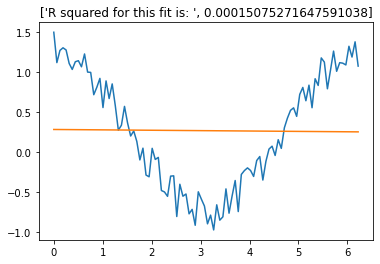

In [5]:
# oh no! Color us all surprised when a simple linear regression fails to fit a nonlinear function!
plt.plot(x,np.transpose(y))
plt.plot(x,y_pred)
plt.title(['R squared for this fit is: ',simple_LR_model.score(x,y)])

In [6]:
# Let's try a different approach: this data looks not unlike a quadratic function. Maybe we can fit that!
x_1 = x
x_2 = pow(x,2)
x = np.hstack((x_1,x_2))
quad_model = LinearRegression().fit(x,y)


Text(0.5, 1.0, "['R squared for this fit is: ', 0.8842330540664226]")

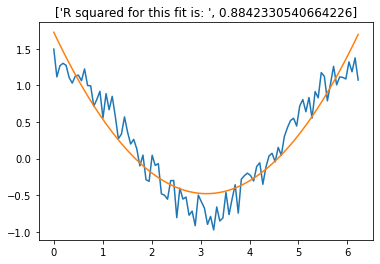

In [7]:
plt.plot(x[:,0],y)
plt.plot(x[:,0],quad_model.predict(x))
plt.title(["R squared for this fit is: ", quad_model.score(x,y)])
# Good golly, this is so much better! Color me shook.

In [8]:
# Maybe if we just increase the number of terms, it'll get ~*even better*~ 
# (Sarcasm)

expander = PolynomialFeatures(degree = 10,include_bias = 0)
expand_x = expander.fit(x).transform(x)
super_poly_model = LinearRegression().fit(expand_x,y)


Text(0.5, 1.0, "['R squared for this fit is: ', 0.9607984498206288]")

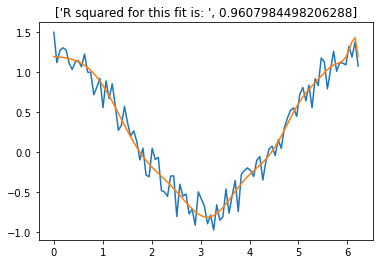

In [9]:
plt.plot(expand_x[:,0],y)
plt.plot(expand_x[:,0],super_poly_model.predict(expand_x))
plt.title(["R squared for this fit is: ", super_poly_model.score(expand_x,y)])
# Hmmmm seems we may have done that thing we're not supposed to do...
# What do they call that? Oh yes, overfitting.

Goodness of fit is maximized by a polynomial of degree:  9
Derivative of goodness of fit is maximized at:  0 . This implies that our simplest model providing a quality fit is a polynomial of degree 2.


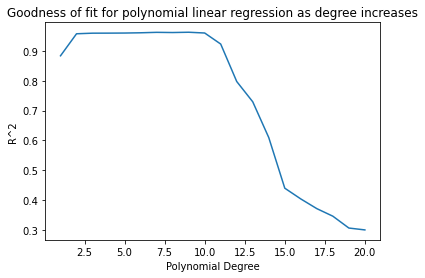

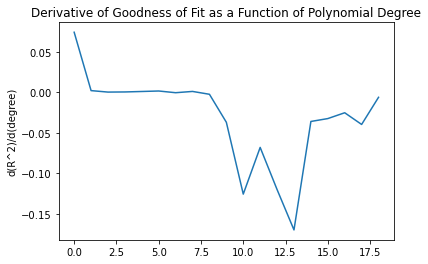

In [10]:
# To find the simplest model that gives us a quality fit, let us try the following:
# Look at the R^2 and return on degree in terms of R^2 for increasing degree
super_poly_gof = np.zeros((20,1))
poly_set = np.arange(1,21,1)
for nt in poly_set:
    
    expander = PolynomialFeatures(degree = nt,include_bias = 0)
    expand_x = expander.fit(x).transform(x)
    super_poly_model = LinearRegression().fit(expand_x,y)
    super_poly_gof[nt-1] = super_poly_model.score(expand_x,y)
    
    
plt.plot(poly_set,super_poly_gof)
plt.title('Goodness of fit for polynomial linear regression as degree increases')
plt.ylabel('R^2')
plt.xlabel('Polynomial Degree')

print("Goodness of fit is maximized by a polynomial of degree: ", poly_set[np.argmax(super_poly_gof)])
deriv = np.diff(super_poly_gof,axis = 0)
plt.figure()
plt.plot(deriv)
plt.title('Derivative of Goodness of Fit as a Function of Polynomial Degree')
plt.ylabel('d(R^2)/d(degree)')


np.argmax(deriv)
print("Derivative of goodness of fit is maximized at: ", np.argmax(deriv), ". This implies that our simplest model providing a quality fit is a polynomial of degree 2.")